Text(0, 0.5, 'Frequency')

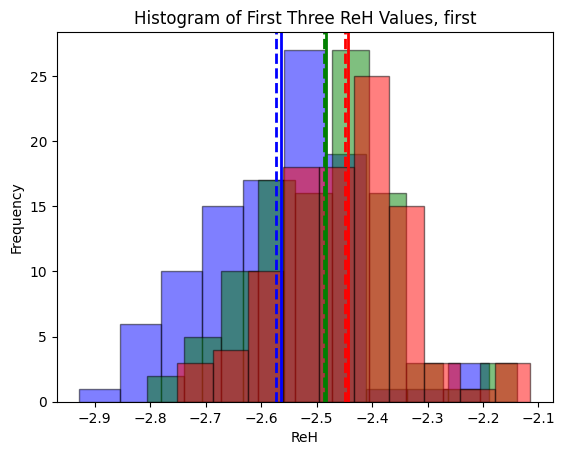

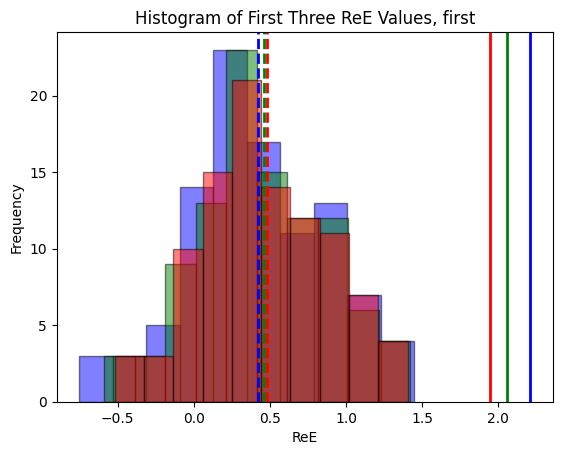

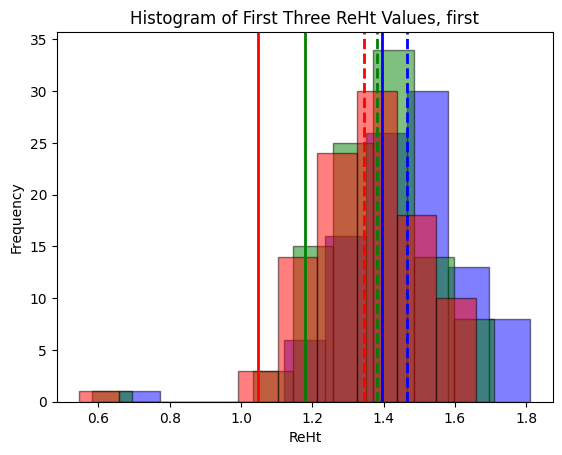

In [1]:
#first run, all three cffs. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
fig_width = 3.385
#fig_height = 2.75 
fig_height = 8 
fontsize = 11 
fontfamily = 'sans-serif'

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('1okin_spreed3.csv')

# Remove non-numerical rows
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
def normalize(QQ, xB, t):
    QQ_norm = -1 + 2 * (QQ / 10) 
    xB_norm = -1 + 2 * (xB / 0.8)
    t_norm = -1 + 2 * ((t + 2) / 2 )
    return QQ_norm, xB_norm, t_norm

def find_matching_rows(df, qq, xb, t):
    #qqq, xbb, ttt = normalize(qq, xb, t)
    # print(qqq)
    
    return df[(df['QQ'] == qq) & (df['xB'] == xb) & (df['t'] == t)]
datafile = "shorted_pseudoo.csv"
def get_data():
    df = pd.read_csv(datafile, dtype=np.float32)
    return df
def filter_unique_sets(df):
    # Drop duplicate rows based on the first column
    unique_rows = df.drop_duplicates(subset=df.columns[0])
    return unique_rows 
ddf = get_data()
ddf = filter_unique_sets(ddf)


# print(df['QQ'][0])
 
norm_Q, norm_xb, norm_t =  normalize(ddf['QQ'], ddf['xB'], ddf['t'])
ddf['QQ'] = norm_Q 
ddf['xB'] = norm_xb
ddf['t'] = norm_t 

#print(find_matching_rows(ddf, df['QQ'][0], df['x_B'][0], df['t'][0]))
matching_first_row = find_matching_rows(ddf, df['QQ'][0], df['x_B'][0], df['t'][0])
matching_second_row = find_matching_rows(ddf, df['QQ'][1], df['x_B'][1], df['t'][1])
matching_third_row = find_matching_rows(ddf, df['QQ'][2], df['x_B'][2], df['t'][2])
#

# Extract the matching values of ReH, ReE, ReHt
matching_ReH_values = pd.concat([matching_first_row['ReH'], matching_second_row['ReH'], matching_third_row['ReH']]).to_numpy()
matching_ReE_values = pd.concat([matching_first_row['ReE'], matching_second_row['ReE'], matching_third_row['ReE']]).to_numpy()
matching_ReHt_values = pd.concat([matching_first_row['ReHtilde'], matching_second_row['ReHtilde'], matching_third_row['ReHtilde']]).to_numpy()

# Number of cycles
num_cycles = len(df) // 89

# Get the values of the first three ReH, ReE, and ReHt in each cycle
first_three_ReH_values = df['ReH_results'][::89].tolist()
second_three_ReH_values = df['ReH_results'][1::89].tolist()
third_three_ReH_values = df['ReH_results'][2::89].tolist()

first_three_ReE_values = df['ReE_results'][::89].tolist()
second_three_ReE_values = df['ReE_results'][1::89].tolist()
third_three_ReE_values = df['ReE_results'][2::89].tolist()

first_three_ReHt_values = df['ReHt_results'][::89].tolist()
second_three_ReHt_values = df['ReHt_results'][1::89].tolist()
third_three_ReHt_values = df['ReHt_results'][2::89].tolist()

# Calculate the means
mean_first_ReH = sum(first_three_ReH_values) / len(first_three_ReH_values)
mean_second_ReH = sum(second_three_ReH_values) / len(second_three_ReH_values)
mean_third_ReH = sum(third_three_ReH_values) / len(third_three_ReH_values)

mean_first_ReE = sum(first_three_ReE_values) / len(first_three_ReE_values)
mean_second_ReE = sum(second_three_ReE_values) / len(second_three_ReE_values)
mean_third_ReE = sum(third_three_ReE_values) / len(third_three_ReE_values)

mean_first_ReHt = sum(first_three_ReHt_values) / len(first_three_ReHt_values)
mean_second_ReHt = sum(second_three_ReHt_values) / len(second_three_ReHt_values)
mean_third_ReHt = sum(third_three_ReHt_values) / len(third_three_ReHt_values)

# Create a figure with multiple subplots
#plt.figure(figsize=(15, 15))

# ReH histogram
#plt.subplot(3, 1, 1)
plt.figure(0)
plt.hist(first_three_ReH_values, bins=10, alpha=0.5, label='First ReH', color='blue', edgecolor='black')
plt.hist(second_three_ReH_values, bins=10, alpha=0.5, label='Second ReH', color='green', edgecolor='black')
plt.hist(third_three_ReH_values, bins=10, alpha=0.5, label='Third ReH', color='red', edgecolor='black')
plt.axvline(mean_first_ReH, color='blue', linestyle='dashed', linewidth=2, label=f'First ReH Mean: {mean_first_ReH:.2f}')
plt.axvline(mean_second_ReH, color='green', linestyle='dashed', linewidth=2, label=f'Second ReH Mean: {mean_second_ReH:.2f}')
plt.axvline(mean_third_ReH, color='red', linestyle='dashed', linewidth=2, label=f'Third ReH Mean: {mean_third_ReH:.2f}')
plt.axvline(matching_ReH_values[0], color='blue',  linewidth=2 )
plt.axvline(matching_ReH_values[1], color='green',  linewidth=2 )
plt.axvline(matching_ReH_values[2], color='red',  linewidth=2 )
plt.title('Histogram of First Three ReH Values, first')
plt.xlabel('ReH')
plt.ylabel('Frequency')
#plt.legend()

# ReE histogram
#plt.subplot(3, 1, 2)
plt.figure(1)
plt.hist(first_three_ReE_values, bins=10, alpha=0.5, label='First ReE', color='blue', edgecolor='black')
plt.hist(second_three_ReE_values, bins=10, alpha=0.5, label='Second ReE', color='green', edgecolor='black')
plt.hist(third_three_ReE_values, bins=10, alpha=0.5, label='Third ReE', color='red', edgecolor='black')
plt.axvline(mean_first_ReE, color='blue', linestyle='dashed', linewidth=2, label=f'First ReE Mean: {mean_first_ReE:.2f}')
plt.axvline(mean_second_ReE, color='green', linestyle='dashed', linewidth=2, label=f'Second ReE Mean: {mean_second_ReE:.2f}')
plt.axvline(mean_third_ReE, color='red', linestyle='dashed', linewidth=2, label=f'Third ReE Mean: {mean_third_ReE:.2f}')
plt.axvline(matching_ReE_values[0], color='blue',  linewidth=2 )
plt.axvline(matching_ReE_values[1], color='green',  linewidth=2 )
plt.axvline(matching_ReE_values[2], color='red',  linewidth=2 )
plt.title('Histogram of First Three ReE Values, first')
plt.xlabel('ReE')
plt.ylabel('Frequency')
#plt.legend()

# ReHt histogram
#plt.subplot(3, 1, 3)
plt.figure(2)
plt.hist(first_three_ReHt_values, bins=10, alpha=0.5, label='First ReHt', color='blue', edgecolor='black')
plt.hist(second_three_ReHt_values, bins=10, alpha=0.5, label='Second ReHt', color='green', edgecolor='black')
plt.hist(third_three_ReHt_values, bins=10, alpha=0.5, label='Third ReHt', color='red', edgecolor='black')
plt.axvline(mean_first_ReHt, color='blue', linestyle='dashed', linewidth=2, label=f'First ReHt Mean: {mean_first_ReHt:.2f}')
plt.axvline(mean_second_ReHt, color='green', linestyle='dashed', linewidth=2, label=f'Second ReHt Mean: {mean_second_ReHt:.2f}')
plt.axvline(mean_third_ReHt, color='red', linestyle='dashed', linewidth=2, label=f'Third ReHt Mean: {mean_third_ReHt:.2f}') 
plt.axvline(matching_ReHt_values[0], color='blue',  linewidth=2 )
plt.axvline(matching_ReHt_values[1], color='green',  linewidth=2 )
plt.axvline(matching_ReHt_values[2], color='red',  linewidth=2 )
plt.title('Histogram of First Three ReHt Values, first')
plt.xlabel('ReHt')
plt.ylabel('Frequency')
#plt.legend()
